# Импорт основных библиотек

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
import model

# Создание набора данных на классификацию

In [2]:
model.set_seed(2)
n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.2)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

# Разбиваем на обучающую и тестовые выборки
train_x, test_x = np.split(X, [n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])

# Визуализация данных для классификации

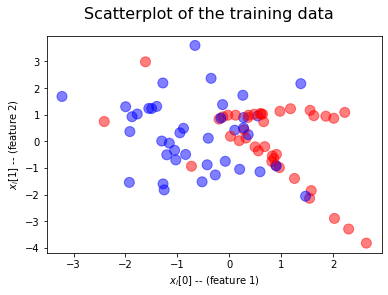

In [5]:
model.plot_dataset('Scatterplot of the training data', train_x, train_labels)


# Пример работы фреймворка на задаче бинарной классификации

In [4]:
model.set_seed(2)
my_model = model.Module(
    net = model.Net([model.Linear(2,8), model.RelU(),model.ResLinear(8,32), model.RelU(),model.Linear(8,2),model.Softmax()]),
    criterion = model.CrossEntropyLoss(),
    optim = model.Momentum_SGD(),
    data_train = [train_x, train_labels],
    data_val = [test_x, test_labels],
    )
my_model.train(epoch = 5, batch_size = 10, lr = 0.1,metrics="Acc")


Epoch 0: train_acc = 0.6375 val_acc = 0.95
Epoch 1: train_acc = 0.675 val_acc = 0.9
Epoch 2: train_acc = 0.6375 val_acc = 0.95
Epoch 3: train_acc = 0.675 val_acc = 0.95
Epoch 4: train_acc = 0.7875 val_acc = 0.95


# Создание набора данных на регрессию

In [54]:
X = np.linspace(0,3,120)
Y = 2.0*X+1.0+np.random.normal(size=(120,))*0.5


# Создание модели из нашего фреймворка

In [6]:
model.set_seed(2)
my_model = model.Module(
    net = model.Net([model.Linear(1,1)]),
    criterion = model.MSELoss(),
    optim = model.RMSprop(),
    data = [X[:, np.newaxis], Y],
    val_split = 0.2,
    )

# Визуализация необученной модели

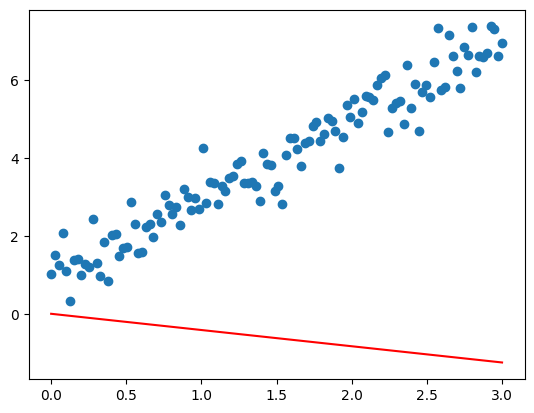

In [7]:
plt.scatter(X,Y)
plt.plot([0,3],my_model.net.forward([[0],[3]]),color='r')

# Обучение и визуализация результатов

Epoch 0: train_Loss = 37.877886615536376 val_Loss = 85.27208403318909
Epoch 1: train_Loss = 6.412663375639812 val_Loss = 26.54726818789809
Epoch 2: train_Loss = 5.395590312944278 val_Loss = 29.4067373422205
Epoch 3: train_Loss = 5.385333338265636 val_Loss = 30.045246482655244
Epoch 4: train_Loss = 5.385593229790141 val_Loss = 30.078920050448584


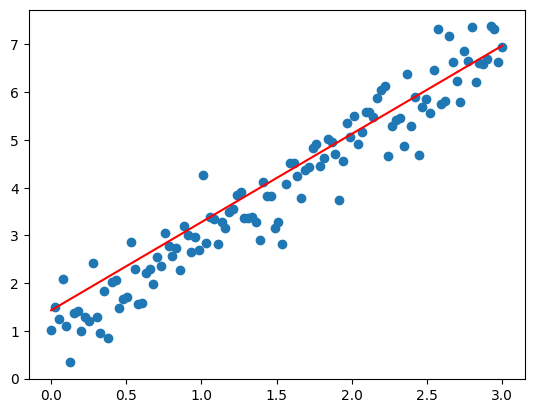

In [8]:
my_model.train(epoch = 5, batch_size = 10, lr = 0.02,metrics="Loss")
plt.scatter(X,Y)
plt.plot([0,3],my_model.net.forward([[0],[3]]),color='r')

# MNIST

# Скачивание датасета

In [ ]:
import torch
import torchvision
batch_size_train = 60000
batch_size_test = 10000
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
# import numpy as np
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Перевод данный из формата torch в numpy

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
train_x = example_data.numpy()
train_labels = example_targets.numpy()

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
test_x = example_data.numpy()
test_labels = example_targets.numpy()

# Визуализация

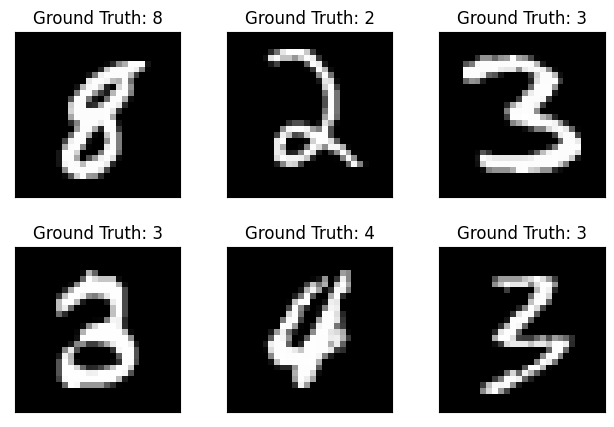

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

# Обучение

In [ ]:
model.set_seed(2)
my_model = model.Module(
    net = model.Net([model.ResLinear(784,10),model.RelU(),model.Linear(784,10),model.Softmax()]),
    criterion = model.CrossEntropyLoss(),
    optim = model.SGD(),
    data_train = [train_x.reshape(-1,784), train_labels],
    data_val = [test_x.reshape(-1,784), test_labels],
    )
my_model.train(epoch = 5, batch_size = 100, lr = 0.01,metrics="Acc")

Epoch 0: train_acc = 0.8478666666666667 val_acc = 0.8379
Epoch 1: train_acc = 0.8749 val_acc = 0.8541
Epoch 2: train_acc = 0.88585 val_acc = 0.8561
Epoch 3: train_acc = 0.8913833333333333 val_acc = 0.8581
Epoch 4: train_acc = 0.89525 val_acc = 0.8575


# Fashion MNIST

# Скачивание датасета

In [8]:
import torch
import torchvision
batch_size_train = 60000
batch_size_test = 10000
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
# import numpy as np
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Перевод данный из формата torch в numpy

In [9]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
train_x = example_data.numpy()
train_labels = example_targets.numpy()

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
test_x = example_data.numpy()
test_labels = example_targets.numpy()

# Визуализация

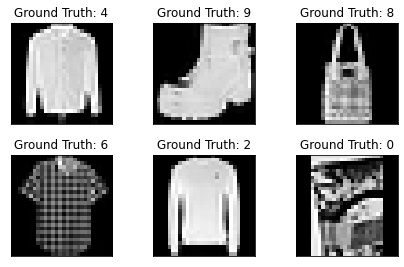

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

# Обучение

In [13]:
model.set_seed(2)
my_model = model.Module(
    net = model.Net([model.ResLinear(784,10),model.RelU(),model.Linear(784,10),model.Softmax()]),
    criterion = model.CrossEntropyLoss(),
    optim = model.SGD(),
    data_train = [train_x.reshape(-1,784), train_labels],
    data_val = [test_x.reshape(-1,784), test_labels],
    )
my_model.train(epoch = 11, batch_size = 100, lr = 0.01,metrics="Acc")

Epoch 0: train_acc = 0.7433333333333333 val_acc = 0.6657
Epoch 1: train_acc = 0.7743333333333333 val_acc = 0.7062
Epoch 2: train_acc = 0.7856 val_acc = 0.7235
Epoch 3: train_acc = 0.7994666666666667 val_acc = 0.7387
Epoch 4: train_acc = 0.8082166666666667 val_acc = 0.7522
Epoch 5: train_acc = 0.81385 val_acc = 0.76
Epoch 6: train_acc = 0.81755 val_acc = 0.7651
Epoch 7: train_acc = 0.8195666666666667 val_acc = 0.767
Epoch 8: train_acc = 0.8217333333333333 val_acc = 0.7692
Epoch 9: train_acc = 0.82335 val_acc = 0.7702
Epoch 10: train_acc = 0.8249333333333333 val_acc = 0.7708


# Iris

In [59]:
from sklearn.datasets import load_iris
#Iris is available from the sklearn package
iris = load_iris()
X, y = iris.data, iris.target

(150, 4)

In [69]:
model.set_seed(2)
my_model = model.Module(
    net = model.Net([model.ResLinear(4,10),model.RelU(),model.Linear(4,3),model.Softmax()]),
    criterion = model.CrossEntropyLoss(),
    optim = model.SGD(),
    data = [X, y],
    val_split = 0.2,
    )
my_model.train(epoch = 10, batch_size = 2, lr = 0.01,metrics="Acc")


Epoch 0: train_acc = 0.5333333333333333 val_acc = 0.2833333333333333
Epoch 1: train_acc = 0.5333333333333333 val_acc = 0.2833333333333333
Epoch 2: train_acc = 0.5333333333333333 val_acc = 0.2833333333333333
Epoch 3: train_acc = 0.6666666666666666 val_acc = 0.5166666666666667
Epoch 4: train_acc = 0.8333333333333334 val_acc = 0.625
Epoch 5: train_acc = 0.8333333333333334 val_acc = 0.625
Epoch 6: train_acc = 0.8333333333333334 val_acc = 0.625
Epoch 7: train_acc = 0.8333333333333334 val_acc = 0.625
Epoch 8: train_acc = 0.8333333333333334 val_acc = 0.625
Epoch 9: train_acc = 0.8333333333333334 val_acc = 0.625
